In [1]:
import mitsuba as mi
mi.set_variant('cuda_ad_rgb')

In [3]:
# Create an alias for convenience
from mitsuba import ScalarTransform4f as T

scene = mi.load_dict({
    'type': 'scene',
    # The keys below correspond to object IDs and can be chosen arbitrarily
    'integrator': {'type': 'path'},
    'light': {'type': 'constant'},
    'teapot': {
        'type': 'ply',
        'filename': '../scenes/rendering_from_multiple_view_points/meshes/teapot.ply',
        'to_world': T.translate([0, 0, -1.5]),
        'bsdf': {
            'type': 'diffuse',
            'reflectance': {'type': 'rgb', 'value': [0.1, 0.2, 0.3]},
        },
    },
})

In [6]:
def load_sensor(r, phi, theta):
    # apply two rotations to convert from spherical coordinates to world 3D
    # coordtinates.
    origin = T.rotate([0, 0, 1], phi).rotate([0, 1, 0], theta) @ mi.ScalarPoint3f([0, 0, r])

    return mi.load_dict({
        'type': 'perspective',
        'fov': 39.3077,
        'to_world': T.look_at(
            origin=origin,
            target=[0, 0, 0],
            up=[0, 0, 1]
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 16
        },
        'film': {
            'type': 'hdrfilm',
            'width': 256,
            'height': 256,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'rgb',
        },
    })

In [7]:
sensor_count = 6

radius = 12
phis = [20.0 * i for i in range(sensor_count)]
theta = 60.0

sensors = [load_sensor(radius, phi, theta) for phi in phis]

In [8]:
images = [mi.render(scene, spp=16, sensor=sensor) for sensor in sensors]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


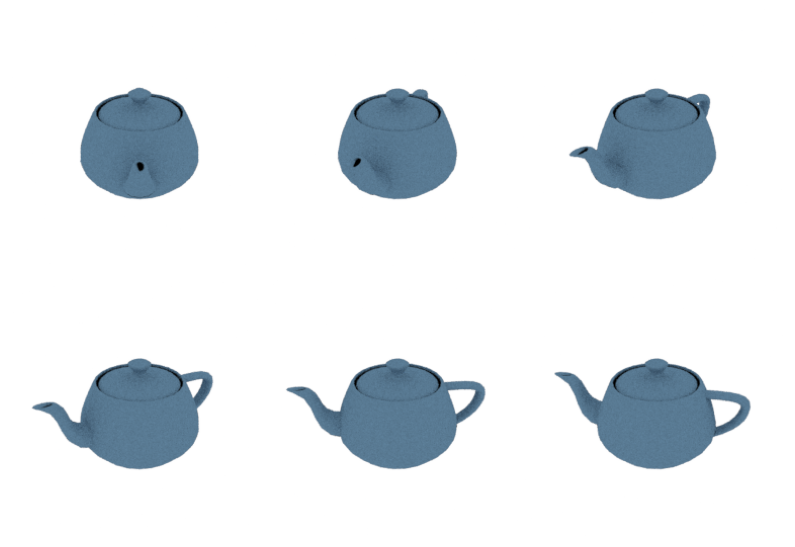

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(wspace=0, hspace=0)
for i in range(sensor_count):
    ax = fig.add_subplot(2, 3, i + 1).imshow(images[i] ** (1.0 / 2.2))
    plt.axis("off")